20F-1106_L15

Question 1(OR Gate Implementation using Perceptron)

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)

    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = 0
        return activation

# Dataset - mimic the behavior of a logical OR.
training_inputs = []
training_inputs.append(np.array([0, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([1, 1]))

# Output labels - mimic the behavior of a logical OR.
labels = np.array([0, 1, 1, 1])  # Adjusted for logical OR behavior

# Training
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

# Prediction
test_inputs = [
    np.array([0, 0]),
    np.array([0, 1]),
    np.array([1, 0])
]

for inputs in test_inputs:
    print(f"Input: {inputs}, Prediction: {perceptron.predict(inputs)}")

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1


Question 2(XOR Gate Implementation using Perceptron)

Iteration: 5000 and 4

[0 1]
[[0.85965602]]


[1 0]
[[0.78145924]]


[1 1]
[[0.30893936]]


[0 0]
[[0.0400578]]


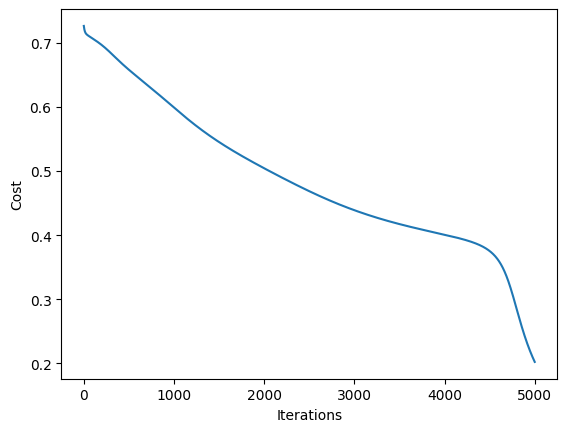

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

num_i_units = 2
num_h_units = 2
num_o_units = 1

learning_rate = 0.1 # 0.001, 0.01 <- Magic values
reg_param = 0 # 0.001, 0.01 <- Magic values
max_iter = 5000 # 5000 <- Magic value
m = 4 # Number of training examples

# The model needs to be over fit to make predictions. Which
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

dW1 = 0
dW2 = 0

dB1 = 0
dB2 = 0

cost = np.zeros((max_iter, 1))
for i in range(max_iter):
    c = 0

    dW1 = 0
    dW2 = 0

    dB1 = 0
    dB2 = 0
    for j in range(m):
        sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

        # Forward Prop.
        a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

        z1 = W1.dot(a0) + B1 # 2x2 * 2x1 + 2x1 = 2x1
        a1 = sigmoid(z1) # 2x1

        z2 = W2.dot(a1) + B2 # 1x2 * 2x1 + 1x1 = 1x1
        a2 = sigmoid(z2) # 1x1

        # Back prop.
        dz2 = a2 - y[j] # 1x1
        dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

        dz1 = np.multiply((W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
        dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

        dB1 += dz1 # 2x1
        dB2 += dz2 # 1x1

        c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
        sys.stdout.flush() # Updating the text.
    W1 = W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * W1)
    W2 = W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * W2)

    B1 = B1 - learning_rate * (dB1 / m)
    B2 = B2 - learning_rate * (dB2 / m)
    cost[i] = (c / m) + (
        (reg_param / (2 * m)) *
        (
            np.sum(np.power(W1, 2)) +
            np.sum(np.power(W2, 2))
        )
    )


for x in X:
    print("\n")
    print(x)
    print(forward(x, predict=True))

plt.plot(range(max_iter), cost)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Question 3(Multi-layer fully connected neural network with one hidden layer)

In [2]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean squared error loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Derivative of mean squared error loss function
def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases with random values
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.random.randn(hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.random.randn(output_size)

    def forward(self, X):
        # Hidden layer computation
        self.hidden_input = np.dot(X, self.weights1) + self.bias1
        self.hidden_output = sigmoid(self.hidden_input)

        # Output layer computation
        self.output_input = np.dot(self.hidden_output, self.weights2) + self.bias2
        self.output = sigmoid(self.output_input)

        return self.output

    def backward(self, X, y_true, y_pred, learning_rate=0.01):
        # Calculate error at output
        output_error = mse_loss_derivative(y_true, y_pred)

        # Backpropagation
        d_weights2 = np.dot(self.hidden_output.T, output_error * sigmoid_derivative(self.output_input))
        d_bias2 = np.sum(output_error * sigmoid_derivative(self.output_input), axis=0)

        # Hidden layer error
        hidden_error = np.dot(output_error * sigmoid_derivative(self.output_input), self.weights2.T)
        d_weights1 = np.dot(X.T, hidden_error * sigmoid_derivative(self.hidden_input))
        d_bias1 = np.sum(hidden_error * sigmoid_derivative(self.hidden_input), axis=0)

        # Update weights and biases
        self.weights1 -= learning_rate * d_weights1
        self.bias1 -= learning_rate * d_bias1
        self.weights2 -= learning_rate * d_weights2
        self.bias2 -= learning_rate * d_bias2

    def train(self, X, y_true, epochs=1000, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute loss
            loss = mse_loss(y_true, y_pred)

            # Backward pass
            self.backward(X, y_true, y_pred, learning_rate)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Example usage:
if __name__ == "__main__":
    # Define data (e.g., XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_true = np.array([[0], [1], [1], [0]])

    # Create neural network
    nn = NeuralNetwork(input_size=2, hidden_size=3, output_size=1)

    # Train neural network
    nn.train(X, y_true, epochs=5000, learning_rate=0.1)

    # Test neural network
    y_pred = nn.forward(X)
    print("Predictions:")
    print(y_pred)


Epoch 0, Loss: 0.4389
Epoch 100, Loss: 0.2973
Epoch 200, Loss: 0.2477
Epoch 300, Loss: 0.2459
Epoch 400, Loss: 0.2446
Epoch 500, Loss: 0.2432
Epoch 600, Loss: 0.2418
Epoch 700, Loss: 0.2404
Epoch 800, Loss: 0.2389
Epoch 900, Loss: 0.2374
Epoch 1000, Loss: 0.2357
Epoch 1100, Loss: 0.2340
Epoch 1200, Loss: 0.2321
Epoch 1300, Loss: 0.2301
Epoch 1400, Loss: 0.2279
Epoch 1500, Loss: 0.2256
Epoch 1600, Loss: 0.2232
Epoch 1700, Loss: 0.2206
Epoch 1800, Loss: 0.2178
Epoch 1900, Loss: 0.2149
Epoch 2000, Loss: 0.2119
Epoch 2100, Loss: 0.2087
Epoch 2200, Loss: 0.2054
Epoch 2300, Loss: 0.2020
Epoch 2400, Loss: 0.1985
Epoch 2500, Loss: 0.1949
Epoch 2600, Loss: 0.1913
Epoch 2700, Loss: 0.1875
Epoch 2800, Loss: 0.1837
Epoch 2900, Loss: 0.1797
Epoch 3000, Loss: 0.1757
Epoch 3100, Loss: 0.1716
Epoch 3200, Loss: 0.1673
Epoch 3300, Loss: 0.1629
Epoch 3400, Loss: 0.1583
Epoch 3500, Loss: 0.1535
Epoch 3600, Loss: 0.1485
Epoch 3700, Loss: 0.1433
Epoch 3800, Loss: 0.1379
Epoch 3900, Loss: 0.1324
Epoch 4000, 